## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1] * 5
y_pred2 = 40 * np.ones(10) + X[1] * 7.5

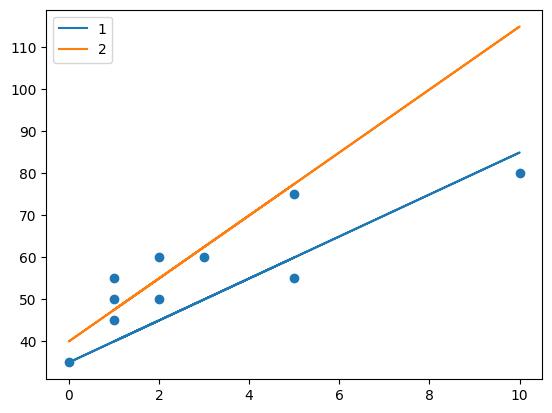

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [9]:
mse_1 = np.mean((y - y_pred1) ** 2)
mse_2 = np.mean((y - y_pred2) ** 2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X, y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

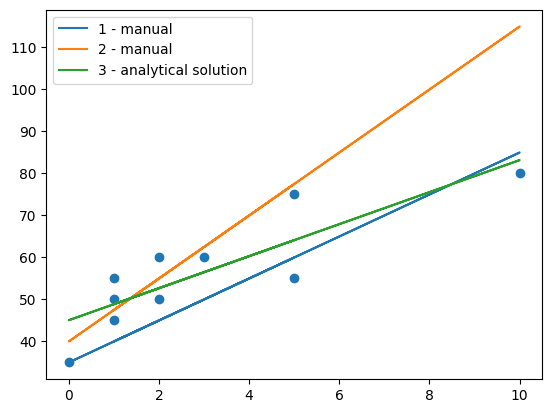

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2) # <=> 1 / n * np.sum((y_pred - y) ** 2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.787499999999998, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1 / n * np.sum((y_pred3 - y) ** 2) # функционал ошибки, y = X * w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1 / n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [23]:
def weights_and_error(alpha, iterrations):
    """
    alpha, iterrations - numbers (ints and/or floats)
    return MSE on step=alpha and iterrations' numbers=iterrations
    """
    X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
    y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
    W = np.array([1, .5])
    for iter_num in range(iterrations):
        y_pred = np.dot(W, X)
        err = np.mean((y - y_pred) ** 2)
        for i in range(W.shape[0]):
            W[i] -= alpha * (1 / X.shape[1] * 2 * np.sum(X[i] * (y_pred - y)))
        if not iter_num % 10:
            alpha /= 1.1
    # Ошибку округляем до четвертого знака после запятой, иначе некоторую миллиардную часть
    # ошибки можно будет уменьшать до бесконечности.     
    return round(err, 4)

In [24]:
alpha_list = [.002, .005, .01, .02, .05, .1, .2]
iterration_list = [10, 25, 50, 100, 200, 250, 500]
error_list = []
num = 0
for alpha in alpha_list:
    for iterrations in iterration_list:
        error_list.append({'alpha': alpha, 'iterrations': iterrations})
        mse = weights_and_error(alpha=alpha, iterrations=iterrations)
        error_list[num].update({'MSE': mse})
        num += 1
best_alpha, best_iterrations, best_error = 0, 0, 1000
for info in error_list:
    if info['MSE'] < best_error:
        best_alpha, best_iterration, best_error = info['alpha'], info['iterrations'], info['MSE']
print(f'Лучший начальный шаг равен {best_alpha}, наименьшее количство итераций для достижения ' 
      f'миниальной ошибки, равной {best_error}, равно {best_iterration}.')

Лучший начальный шаг равен 0.1, наименьшее количство итераций для достижения миниальной ошибки, равной 43.9688, равно 200.


*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [25]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, .5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1 / n * 2 * np.sum(X * (y_pred - y), axis=1))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
        
print('\nЕсли при сложении матриц мы хотим получить не число, а матрицу, и используем функцию '
      'numpy.sum(), необходимо указать ось, по которой производится сложение.')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27

Если при сложении матриц мы хотим получить не число, а матрицу, и используем функцию numpy.sum(), необходимо указать ось, по которой производится сложение.


*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [26]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, .5])
stop = 1e-4  # цикл поиска наименьшей ошибки будет прерываться, когда изменения между соседними
             # значениями будет разница,равная и меньше этого параметра
previous_value = 1000

for i in range(1000):
    y_pred = np.dot(W, X)
    value = np.mean((y - y_pred) ** 2)
    W -= alpha * (1 / n * 2 * np.sum((X * (y_pred - y)), axis=1))
    if previous_value and abs(previous_value - value) < stop:
        break
    previous_value = value
    print(f'Iteration #{i}: W_new = {W}, MSE = {value}')
print(f'\nTHE END\nIteration #{i}: W_new = {W}, MSE = {value}, MSE_pred = {previous_value}')

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #1: W_new = [2.9122 6.6934], MSE = 1777.0353
Iteration #2: W_new = [3.582352 8.242912], MSE = 1233.1246862399998
Iteration #3: W_new = [4.14613024 9.2253808 ], MSE = 995.6119136616959
Iteration #4: W_new = [4.63968479 9.83998351], MSE = 887.3532060945618
Iteration #5: W_new = [ 5.08649208 10.21600803], MSE = 833.705103731704
Iteration #6: W_new = [ 5.50180176 10.43737578], MSE = 803.2133893510011
Iteration #7: W_new = [ 5.89552318 10.55855991], MSE = 782.6219704436712
Iteration #8: W_new = [ 6.27409912 10.61491815], MSE = 766.3427039405009
Iteration #9: W_new = [ 6.64172205 10.62940003], MSE = 752.0184356756685
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.6534565814403
Iteration #11: W_new = [ 7.35408709 10.58708704], MSE = 725.8257570810141
Iteration #12: W_new = [ 7.70178013 10.54623222], MSE = 713.3551043907684
Iteration #13: W_new = [ 8.04497059 10.49840646], MSE = 701.1631838639864
Iteration #14: W_new = [ 8.3